In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
url = "https://bit.ly/4nejNue"
try:
    df = pd.read_csv(url)
except:
    import io
    import requests
    response = requests.get(url)
    df = pd.read_csv(io.StringIO(response.text), header=None,
                   names=['sepal_length', 'sepal_width',
                          'petal_length', 'petal_width',
                          'species'])

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
numeric_cols = df.select_dtypes(include=['number']).columns
print("Numeric columns found:", list(numeric_cols))

Numeric columns found: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


In [18]:
if len(numeric_cols) > 0:
    print("\nMean values:")
    print(df[numeric_cols].mean())
    print("\nMedian values:")
    print(df[numeric_cols].median())
    print("\nStandard deviation:")
    print(df[numeric_cols].std())
else:
    print("No numeric columns found for statistical analysis")


Mean values:
sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

Median values:
sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

Standard deviation:
sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64


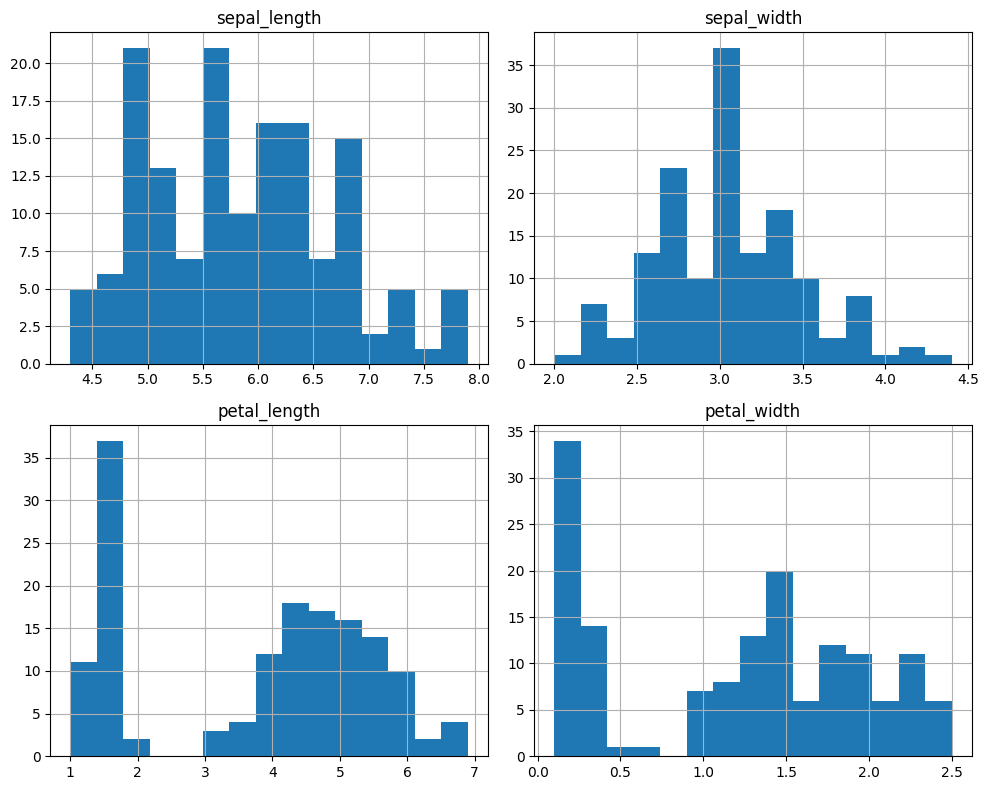

In [19]:
if len(numeric_cols) > 0:
    df[numeric_cols].hist(figsize=(10,8), bins=15)
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns to visualize")


Species distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


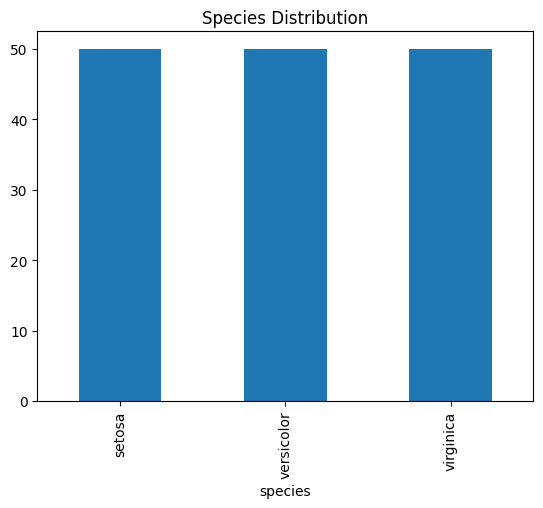

In [20]:
if 'species' in df.columns:
    print("\nSpecies distribution:")
    print(df['species'].value_counts())
    df['species'].value_counts().plot(kind='bar')
    plt.title("Species Distribution")
    plt.show()